In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="1"

## 2.1 loading data

In [3]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [4]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [5]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train=train.drop(labels = ["label"],axis = 1) 
Y_train=train['label']
print(X_train.shape)
print(Y_train.shape)

(42000, 784)
(42000,)


In [8]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

### visualizing the number of different labels in traing data

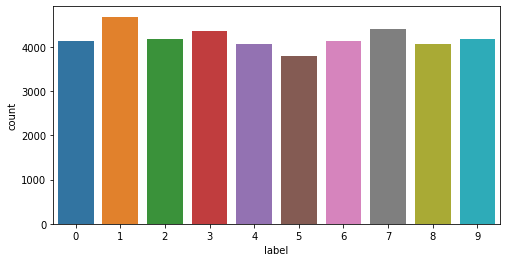

In [9]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=train);

## 2.2 Normalizing data

In [10]:
X_train=X_train.astype('float32')/255
test=test.astype('float32')/255

## 2.3 Reshape

In [11]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [12]:
X_train.shape

(42000, 28, 28, 1)

In [13]:
test.shape

(28000, 28, 28, 1)

## 2.4 Label Encoding

In [14]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [15]:
Y_train.shape

(42000, 10)

In [16]:
print(Y_train[:5])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## 2.5 Now we will split training data into training data and validation data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)

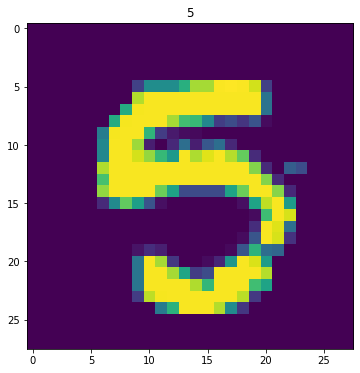

In [18]:
plt.figure(figsize=(6,6))
plt.imshow(X_train[1][:,:,0])
plt.title(Y_train[1].argmax());

# 3. Building CNN architecture using keras

## 3.1 Defining cnn model

In [19]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [20]:
inputShape=(28,28,1)
input = Input(inputShape)

x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv1',padding='same')(input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)



x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)

x = Conv2D(32,(3,3),strides = (1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool3')(x)


x = Flatten()(x)
x = Dense(64,activation = 'relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation = 'relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation = 'softmax',name='fc2')(x)

model = Model(inputs = input,outputs = x,name='Predict')

W0711 14:35:22.752840 140621680465728 deprecation_wrapper.py:119] From /home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 14:35:22.761948 140621680465728 deprecation_wrapper.py:119] From /home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 14:35:22.763923 140621680465728 deprecation_wrapper.py:119] From /home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 14:35:22.779812 140621680465728 deprecation_wrapper.py:119] From /home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.ge

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
__________

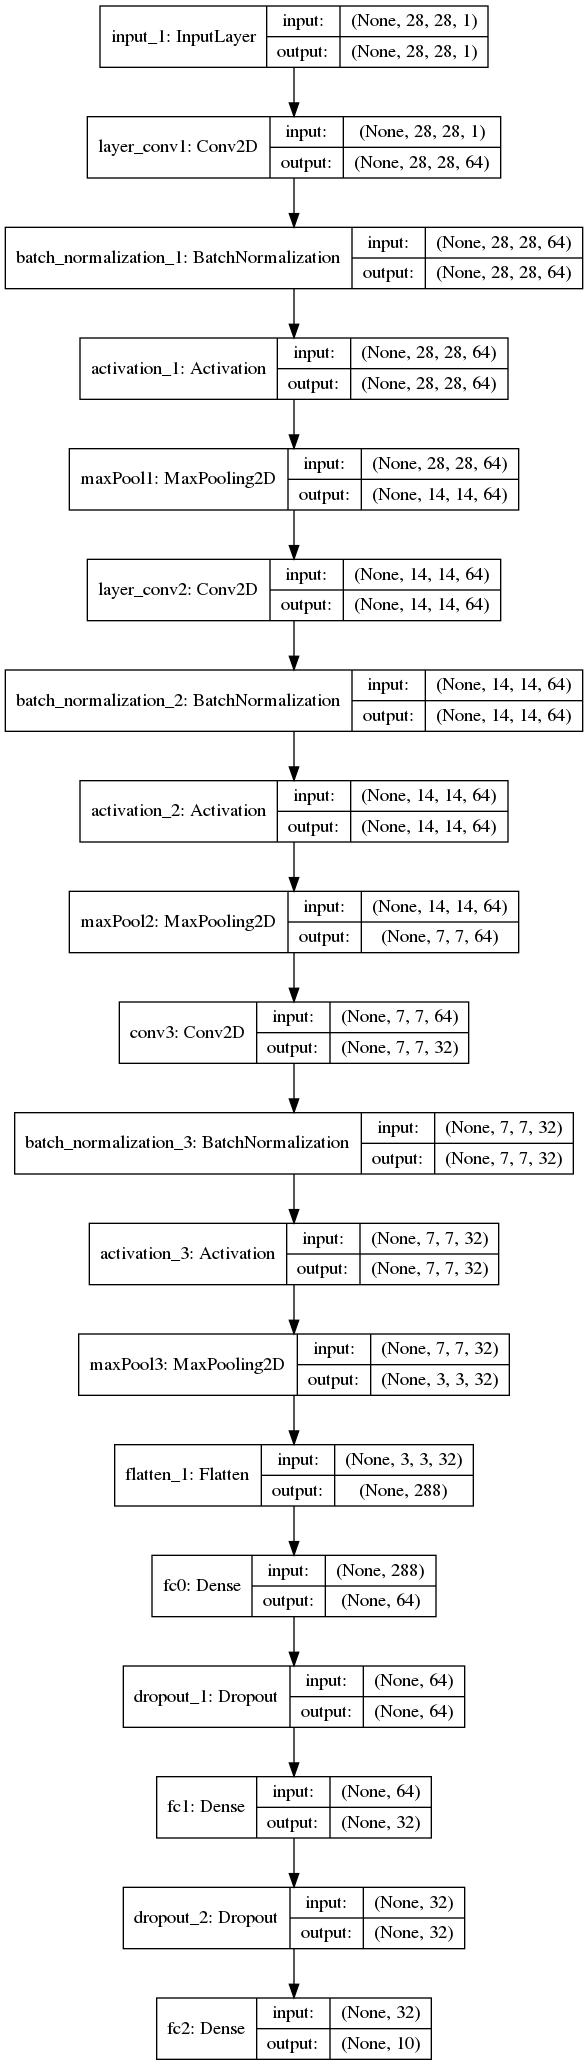

In [41]:
from keras.utils import plot_model

plot_model(model, to_file='./model.png', show_shapes=True)
plot_model(model, to_file='./model.svg', show_shapes=True)
from IPython.display import Image
Image('./model.png')

## 3.2 Data Augmentation

In [22]:
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally 
    height_shift_range=0.2,# randomly shift images vertically 

    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(X_train)

## 3.3 optimizer

In [23]:
# define SGD optimizer
momentum = 0.5
sgd = SGD(lr=0.01, momentum=momentum, decay=0.0, nesterov=False) 

# compile the model
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])

W0711 14:35:23.596946 140621680465728 deprecation_wrapper.py:119] From /home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



## Learning Rate Schedules
### we will drop learning rate after every 3 epochs

In [24]:
import math
def step_decay(epoch):
    
    
    initial_lrate=0.1
    drop=0.6
    epochs_drop = 3.0
    lrate= initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate
   

lrate = LearningRateScheduler(step_decay)
callbacks_list = [ lrate]

In [25]:
history=model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid),
                          epochs=35,callbacks=callbacks_list,verbose=1)

W0711 14:35:23.671824 140621680465728 deprecation.py:323] From /home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 37800 samples, validate on 4200 samples
Epoch 1/35
37800/37800 [==============================] - 6s 157us/step - loss: 0.4104 - acc: 0.8692 - val_loss: 0.1654 - val_acc: 0.9533
Epoch 2/35
37800/37800 [==============================] - 5s 121us/step - loss: 0.1462 - acc: 0.9604 - val_loss: 0.1229 - val_acc: 0.9690
Epoch 3/35
37800/37800 [==============================] - 7s 194us/step - loss: 0.0875 - acc: 0.9767 - val_loss: 0.0529 - val_acc: 0.9867
Epoch 4/35
37800/37800 [==============================] - 6s 165us/step - loss: 0.0759 - acc: 0.9801 - val_loss: 0.0455 - val_acc: 0.9881
Epoch 5/35
37800/37800 [==============================] - 6s 155us/step - loss: 0.0637 - acc: 0.9828 - val_loss: 0.0431 - val_acc: 0.9886
Epoch 6/35
37800/37800 [==============================] - 7s 180us/step - loss: 0.0484 - acc: 0.9863 - val_loss: 0.0527 - val_acc: 0.9876
Epoch 7/35
37800/37800 [==============================] - 7s 181us/step - loss: 0.0452 - acc: 0.9878 - val_loss: 0.0499 - v

### above we have not run our model with augmented data
### we can run our model model with augmentated data like below

In [26]:
# model.fit_generator(datagen_train.flow(X_train, Y_train, batch_size=16), validation_data=(X_valid, Y_valid),
                          # epochs=10,steps_per_epoch=X_train.shape[0],callbacks=[checkpointer,lrate], verbose=1)

# model Evaluation
## 4.1 plotting training and validation loss

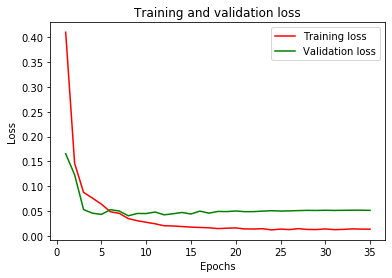

In [27]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 4.2 plotting training and validation accuracy

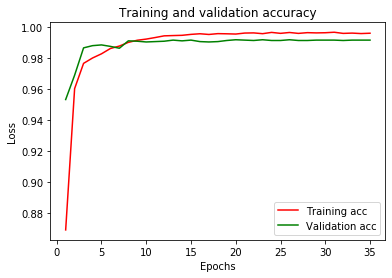

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
print("on valid data")
pred1=model.evaluate(X_valid,Y_valid)
print("accuaracy", str(pred1[1]*100))
print("Total loss",str(pred1[0]*100))

on valid data
4200/4200 [==============================] - 0s 57us/step
accuaracy 99.16666666666667
Total loss 5.130572885643319


## Visualize CNN Layers

In [31]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
layer_outputs = layer_outputs[1:] 
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[10].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

### Displaying original Image

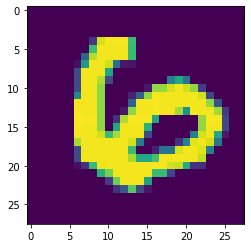

In [32]:
plt.imshow(X_train[10][:,:,0]);

#### Desplaying above image after layer 2 .
#### layer 1 is input layer .

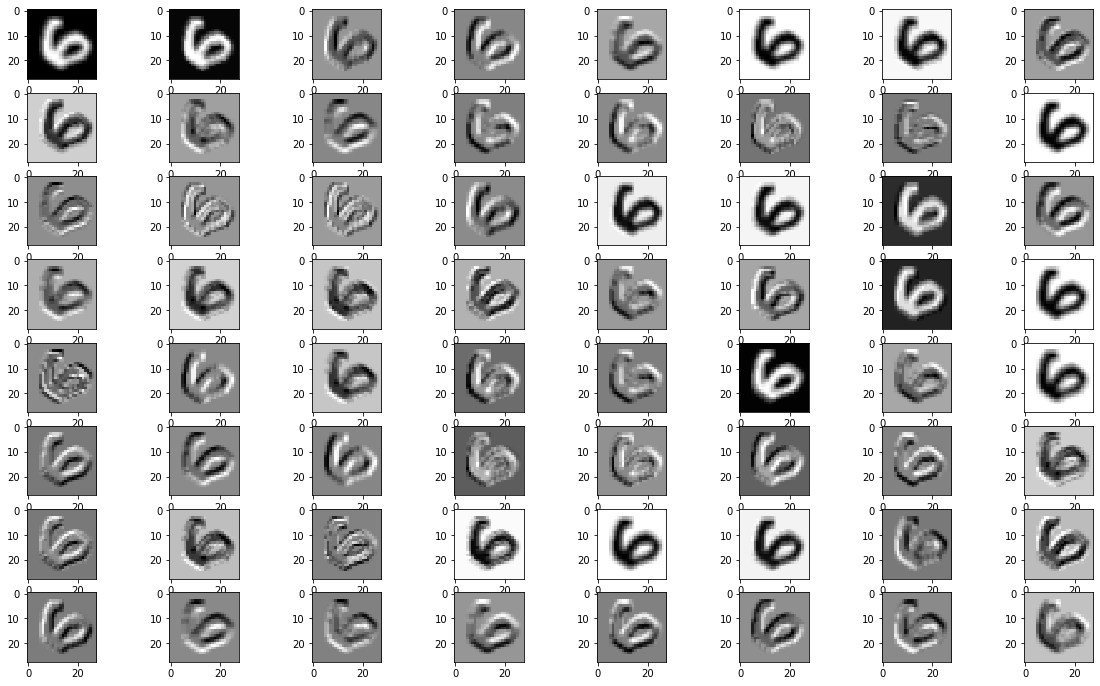

In [34]:
display_activation(activations, 8, 8, 1)

#### Displaying output of layer 4

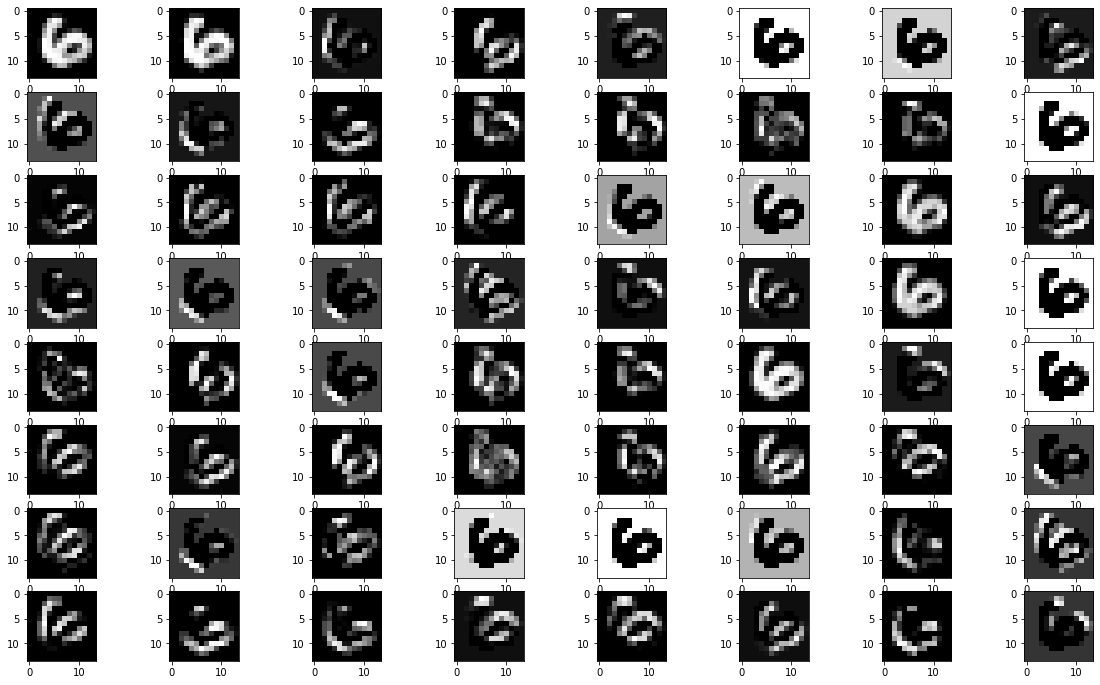

In [35]:
display_activation(activations, 8, 8, 3)

#### Displaying output of layer 8

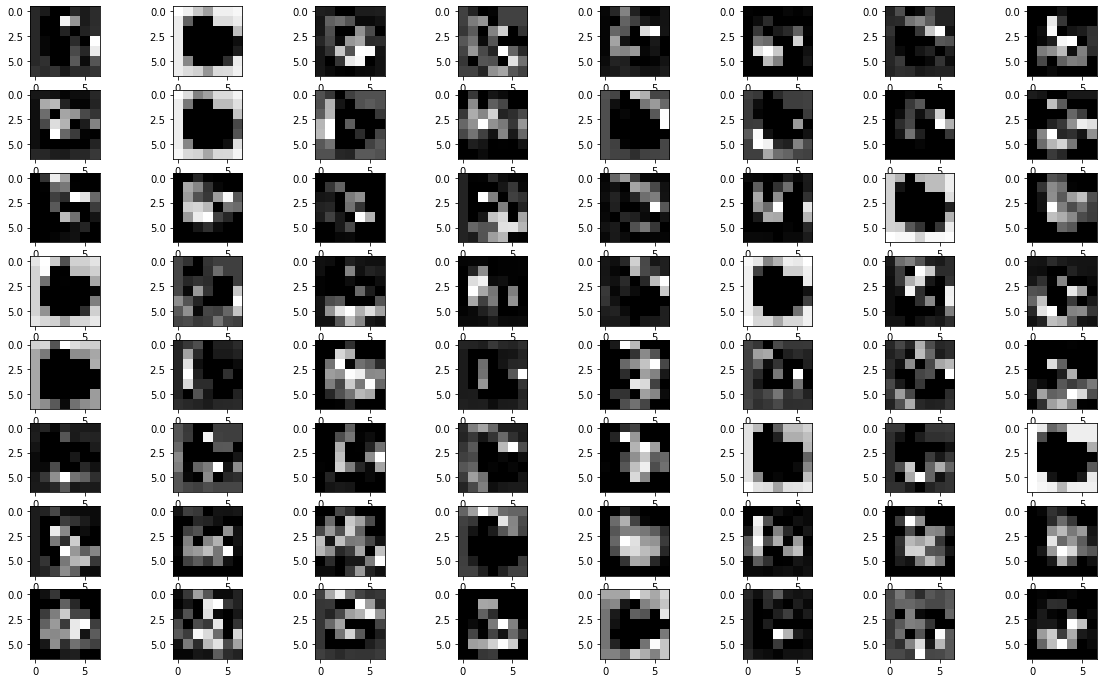

In [36]:
display_activation(activations, 8, 8, 7)

In [37]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict(X_valid)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_valid,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

## 4.3 confusion matrix

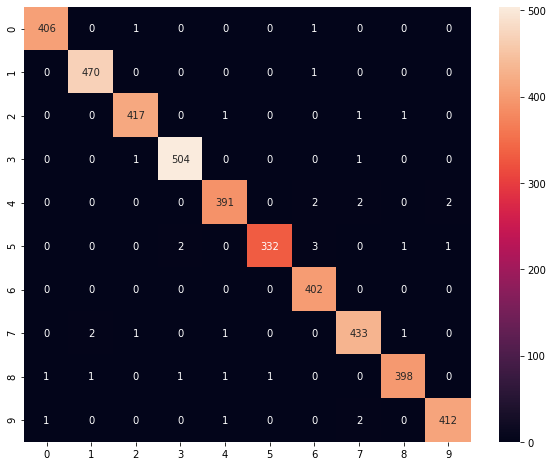

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

In [39]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

In [40]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(results)+1)),
                         "Label": results})
submissions.to_csv("re2-submission.csv", index=False, header=True)